# N dice

Simulation of  the evolution of the distribution of the sum of $N$ dice as a function of the number of throws, compared with the expected average distribution.

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib inline

In [2]:
def die():
    '''Single die. Change weights to make it unfair'''
    return random.choices([1, 2, 3, 4, 5, 6], 
                         weights=[1/6, 1/6, 1/6, 1/6, 1/6, 1/6] # change this to make die unfair
                         )[0]

def dice(ndice=1):
    return sum([ die() for _ in range(ndice) ])

In [3]:
ndice = 6
nthrow = 500

throws = np.array([ dice(ndice) for _ in range(nthrow) ])

nmin = ndice
nmax = ndice*6
nbin = nmax-nmin+2
hbins = np.linspace(nmin-0.5, nmax+1-0.5, nbin)
n, _ = np.histogram(throws,hbins)

## Multinomial distribution

Probability $P$ of a given total value $T$ as a function of the number of dice $n$, the maximum number on each dice $s$:

$$
\begin{equation}
  P(T;N,s) =   (\sum^{\lfloor{\frac{T-n}{s}}\rfloor{}}_{k=0}  (-1)^{k} \frac{n!}{(n-k)!k!}\frac{(T-sk-1)!}{(T-sk-n)!(n-1)!}) (\frac{1}{s})^{n}
\end{equation}$$

In [4]:
from math import factorial 

def binomialCoeff(n,k):
    return (factorial(n)/(factorial((n-k))*factorial(k)))

def multinomial(T,n=2,s=6):
    P = 0
    for k in range(0,int((T-n)/s+1)):
        P += (-1)**k * binomialCoeff(n,k) * binomialCoeff(T-s*k-1,n-1) * (1/s)**n 
    return P

T = [ t for t in range(nmin,nmax+1) ]
Ptrue = nthrow * np.array([ multinomial(T,ndice,s=6) for T in range(nmin,nmax+1)])

Text(0.5, 0, '$\\sum N_i$')

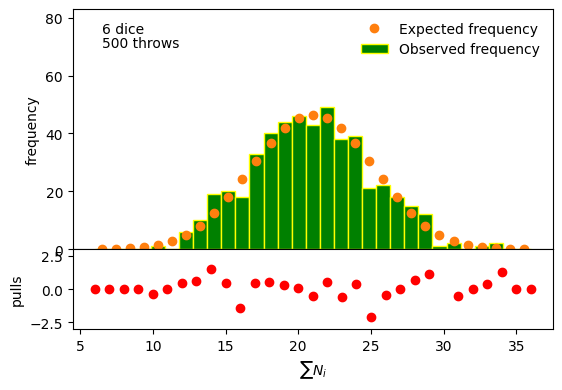

In [8]:
i = nthrow

fig = plt.figure(figsize=(6,4),dpi=100)

frame1 = fig.add_axes((.1,.3,.8,.6))
freq,_,bar_container = frame1.hist(throws[:i], hbins, lw=1, ec="yellow", fc="green", label="Observed frequency")
plt.plot(T,Ptrue,"o",label = "Expected frequency")
plt.ylim([0,nthrow//ndice])
ymin,ymax = frame1.get_ylim()
plt.text(nmin,ymax*0.9, r'{:d} dice'.format(ndice))
text = plt.text(nmin,ymax*0.84, r'{:d} throws'.format(nthrow))
plt.xlabel('$\sum N_i$')
plt.ylabel('frequency')
plt.legend(loc=1,frameon=False)
plt.tick_params(bottom=False,labelbottom=False)

frame2=fig.add_axes((.1,.1,.8,.2)) 
pulls = np.array([ (f-p)/np.sqrt(f) if f>0 else 0 for f,p in zip(freq,Ptrue) ])
plt.plot(T,pulls,"o",color="r")

frame2.set_ylim([-3,3])
plt.ylabel('pulls')
plt.xlabel('$\sum N_i$')

Text(0.5, 0, '$\\sum N_i$')

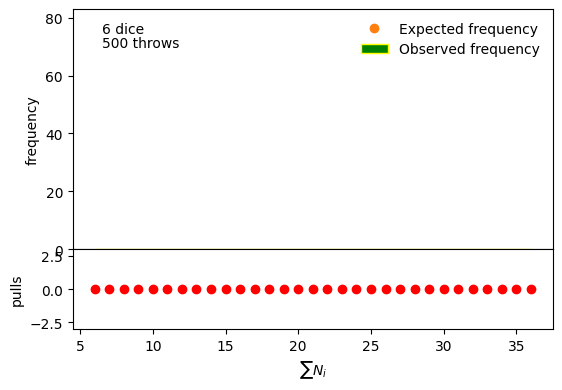

In [9]:
fig = plt.figure(figsize=(6,4),dpi=100)

frame1 = fig.add_axes((.1,.3,.8,.6))
freq,_,bar_container = frame1.hist([], hbins, lw=1, ec="yellow", fc="green", label="Observed frequency")
truth, = plt.plot([],[],"o",label = "Expected frequency")
plt.ylim([0,nthrow//ndice])
ymin,ymax = frame1.get_ylim()
nd = plt.text(nmin,ymax*0.9, r'{:d} dice'.format(ndice))
text = plt.text(nmin,ymax*0.84, r'{:d} throws'.format(nthrow))
plt.xlabel('$\sum N_i$')
plt.ylabel('frequency')
plt.legend(loc=1,frameon=False)
plt.tick_params(bottom=False,labelbottom=False)

frame2=fig.add_axes((.1,.1,.8,.2))
T = [ t for t in range(nmin,nmax+1) ]
pullp, = plt.plot(T,[0 for _ in T],"o",color="r")
frame2.set_ylim([-3,3])
plt.ylabel('pulls')
plt.xlabel('$\sum N_i$')

In [12]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML, Image

def die_init():
    text.set_text("")
    return (text,)

def die_animate(i):
    nmin = ndice
    nmax = ndice*6
    n, _ = np.histogram(throws[:i],hbins)
    for count,rect in zip(n,bar_container.patches):
        rect.set_height(count)
    T = [ t for t in range(nmin,nmax+1) ]
    ftrue = i*np.array([multinomial(t,ndice,s=6) for t in T])
    truth.set_data(T,ftrue)
    frame1.set_ylim([0,sum(n)//4+3])
    ymin,ymax = frame1.get_ylim()
    nd.set_position([nmin,0.9*ymax])
    nd.set_text(r'{:d} die'.format(ndice))
    text.set_position([nmin,0.84*ymax])
    text.set_text(r'{:d} throws'.format(i))
    pulls = np.array([ (f-p)/np.sqrt(f) if f>0 else 0 for f,p in zip(n,ftrue) ])
    pullp.set_data(T,pulls)
    return (text,)

anim = FuncAnimation(fig,die_animate,frames=range(len(throws)),init_func=die_init,blit=True)

In [13]:
HTML(anim.to_html5_video())

In [14]:
anim.save('dice.gif', writer='imagemagick', fps=10)

In [15]:
Image(url='dice.gif')